# Скрипт для проведения кластеризации
Данный скрипт позволяет выполнить иерархическую кластеризацию и методом k-средних.

In [123]:
# загрузим библиотеки
# данные библиотеки являются стандартными для пакета Anaconda
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import *
from matplotlib import pyplot as plt
from matplotlib import rc
import numpy as np
from sklearn.cluster import KMeans
#данная строчка нужна для корректного отображения графиков
%matplotlib inline 

In [124]:
# Загрузим данные из xls документа
data = pd.read_excel('Clust.xlsx', sheet_name='Лист1')
# команда data.head() выводит первые пять строчек загруженных в переменную дата данных
data.head(10)

,pregnancies,plasma glucose,blood pressure,triceps skin thickness,insulin,diabetes pedigree,age
0,6,148,72,35,0,0.627,50
1,1,85,66,29,0,0.351,31
2,8,183,64,0,0,0.672,32
3,1,89,66,23,94,0.167,21
4,0,137,40,35,168,2.288,33
5,5,116,74,0,0,0.201,30
6,3,78,50,32,88,0.248,26
7,10,115,0,0,0,0.134,29
8,2,197,70,45,543,0.158,53
9,8,125,96,0,0,0.232,54


# Изучение структуры данных

In [125]:
# посомтрим основные статистические параметры данных
data.describe()

,pregnancies,plasma glucose,blood pressure,triceps skin thickness,insulin,diabetes pedigree,age
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,4.355000,123.945000,70.410000,20.625000,83.265000,0.458380,34.670000
std,3.501468,32.298886,19.666871,15.991027,125.616849,0.327973,11.794774
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.118000,21.000000
25%,1.000000,102.000000,62.000000,0.000000,0.000000,0.248000,25.000000
50%,3.000000,121.000000,74.000000,23.500000,0.000000,0.355000,31.000000
75%,7.000000,145.000000,82.000000,33.000000,132.750000,0.583750,43.000000
max,13.000000,199.000000,114.000000,60.000000,846.000000,2.288000,70.000000


C:\Users\i7930\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


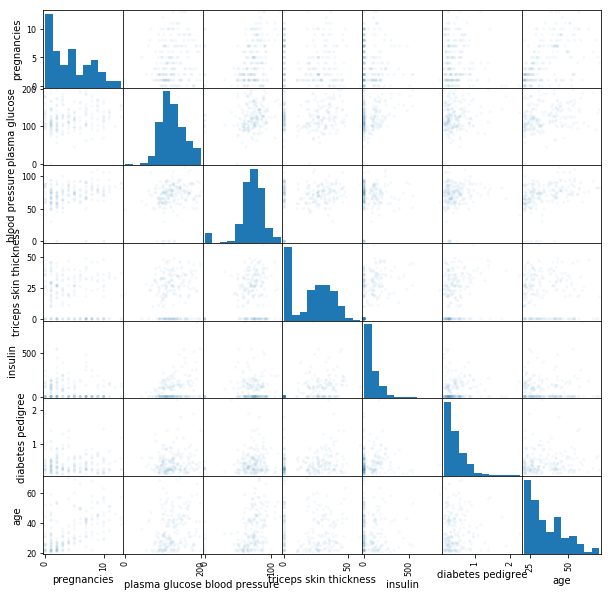

In [130]:
# построим диаграммы рассеивания и гистограммы для столбцов
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data, alpha=0.05, figsize=(10, 10));

In [131]:
# посмотрим наличие корреляций между значениями
data.corr()

,pregnancies,plasma glucose,blood pressure,triceps skin thickness,insulin,diabetes pedigree,age
pregnancies,1.000000,0.142138,0.249486,-0.161309,-0.156872,-0.104796,0.535673
plasma glucose,0.142138,1.000000,0.222402,0.072093,0.350601,0.135348,0.259691
blood pressure,0.249486,0.222402,1.000000,0.160612,0.039120,0.094714,0.356252
triceps skin thickness,-0.161309,0.072093,0.160612,1.000000,0.433269,0.179988,-0.085171
insulin,-0.156872,0.350601,0.039120,0.433269,1.000000,0.021106,-0.014657
diabetes pedigree,-0.104796,0.135348,0.094714,0.179988,0.021106,1.000000,0.048205
age,0.535673,0.259691,0.356252,-0.085171,-0.014657,0.048205,1.000000


Text(0, 0.5, 'age')

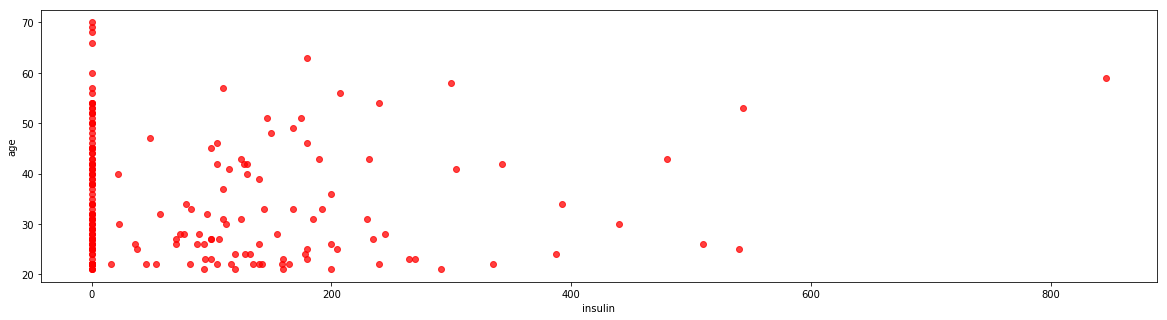

In [132]:
# Изменяя названия столбцов можно построить диаграммы рассеиванию двух параметров
# Замените названия стобцов col1 и col2
col1 = 'insulin'
col2 = 'age'

plt.figure(figsize=(20, 5))

plt.scatter(data[col1],
            data[col2],
            alpha=0.75,
            color='red')
plt.xlabel(col1)
plt.ylabel(col2)

# Готовим данные к кластеризации


In [135]:
#выведем первую строку
data_for_clust[0]

array([  6.   , 148.   ,  72.   ,  35.   ,   0.   ,   0.627,  50.   ])

In [136]:
# загружаем библиотеку препроцесинга данных
# эта библиотека автоматически приведен данные к нормальным значениям
from sklearn import preprocessing
dataNorm = preprocessing.scale(data_for_clust)

In [137]:
# Вычислим расстояния между каждым набором данных,
# т.е. строками массива data_for_clust
# Вычисляется евклидово расстояние (по умолчанию)
data_dist = pdist(dataNorm, 'euclidean')
# Главная функция иерархической кластеризии
# Объедение элементов в кластера и сохранение в 
# специальной переменной (используется ниже для визуализации 
# и выделения количества кластеров
data_linkage = linkage(data_dist, method='average')

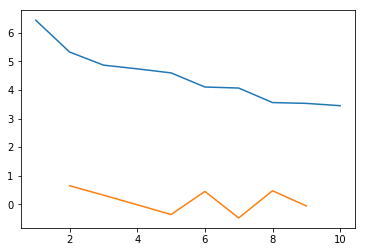

clusters: 2


In [138]:
# Метод локтя. Позволячет оценить оптимальное количество сегментов.
# Показывает сумму внутри групповых вариаций
last = data_linkage[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2 
print("clusters:", k)

In [139]:
#функция построения дендрограмм
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

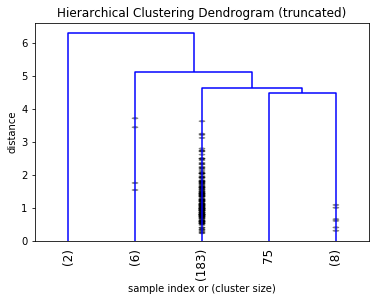

In [93]:
#
# указываем количество кластеров!
#
nCluster=5

#строим дендрограмму 
fancy_dendrogram(
    data_linkage,
    truncate_mode='lastp',
    p=nCluster, 
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
)
plt.show()

# Метод иерархической кластеризации
Ее можно выполнять указывая или максимальное расстояние между класстерами (ячейка ниже) или указывая количество кластеров (через одну)

In [140]:
#импортируем дополнительную библиотеку 
from scipy.cluster.hierarchy import fcluster
max_d = 30 #максимальное расстояние, можно изменять
# находим количество кластеров, между которыми растояние более max_d
clusters = fcluster(data_linkage, max_d, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [141]:
k=6 #заданное количество кластеров. Можно менять
clusters=fcluster(data_linkage, k, criterion='maxclust')
clusters

array([4, 4, 4, 4, 2, 4, 4, 5, 1, 4, 4, 4, 3, 1, 4, 5, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 2, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 5, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 4, 4, 5, 4, 4, 4, 4, 2, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 5, 4, 4, 5, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4], dtype=int32)

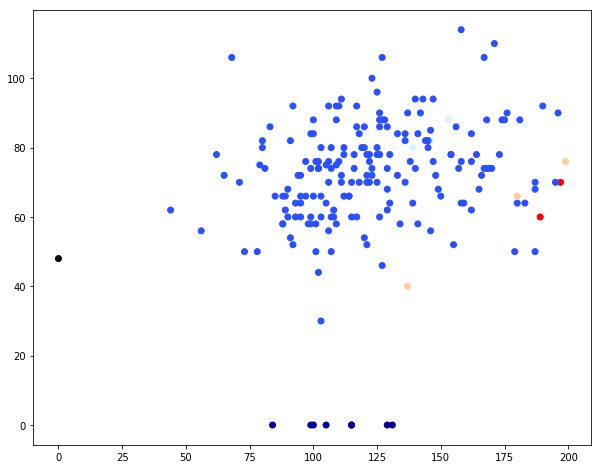

In [142]:
# рисуем график. Выбираем лучшее с точки зрения разбиения.
plt.figure(figsize=(10, 8))
# изменяя номеря сечений, можем выводить распределения в любых осях
plt.scatter(data_for_clust[:,1], data_for_clust[:,2], c=clusters, cmap='flag') 
plt.show()

Результат кластеризации - это одномерный массив с номер класстера к которому относится строка оригинальных данных. 
для удобства обработки мы совместим оригинальные данные и номера кластеров.

In [143]:
# к оригинальным данным добавляем 
dataI=data
dataI['cluster_no']=clusters
# Имя и название файла ниже можно изменять. Если файл не существует, то будем создан
writer = pd.ExcelWriter('result.xlsx')
dataI.to_excel(writer,'IER')
writer.save()

# Кластеризация методом k-means

In [144]:
# строим кластеризаци методом KMeans
#
# n_clusters - укажите количество кластеров, которые вам необходимы
#
km = KMeans(n_clusters=6).fit(dataNorm)
# выведем полученное распределение по кластерам
# так же номер кластера, к котрому относится строка, так как нумерация начинается с нуля, выводим добавляя 1
km.labels_ +1

array([2, 4, 3, 4, 1, 3, 4, 6, 5, 2, 3, 2, 2, 5, 2, 6, 4, 3, 4, 4, 1, 2,
       2, 2, 2, 2, 3, 4, 2, 3, 2, 1, 4, 3, 2, 1, 2, 2, 4, 1, 4, 3, 2, 2,
       3, 1, 3, 4, 4, 6, 4, 4, 4, 5, 5, 4, 5, 1, 1, 4, 6, 3, 3, 4, 3, 4,
       1, 3, 4, 4, 1, 4, 2, 4, 4, 4, 3, 4, 6, 4, 2, 1, 2, 1, 5, 2, 4, 4,
       2, 2, 4, 2, 2, 4, 2, 1, 2, 3, 2, 3, 3, 4, 4, 4, 4, 3, 2, 4, 3, 4,
       1, 5, 3, 2, 1, 2, 3, 5, 4, 6, 3, 3, 4, 2, 1, 6, 4, 4, 6, 4, 2, 4,
       5, 2, 2, 4, 3, 5, 1, 2, 4, 2, 3, 4, 4, 2, 3, 4, 4, 4, 3, 3, 4, 3,
       1, 4, 3, 4, 4, 2, 4, 3, 2, 4, 4, 2, 2, 2, 4, 1, 5, 3, 1, 4, 4, 5,
       2, 1, 2, 3, 3, 2, 4, 2, 3, 2, 4, 4, 3, 5, 4, 4, 2, 4, 4, 4, 4, 3,
       4, 5])

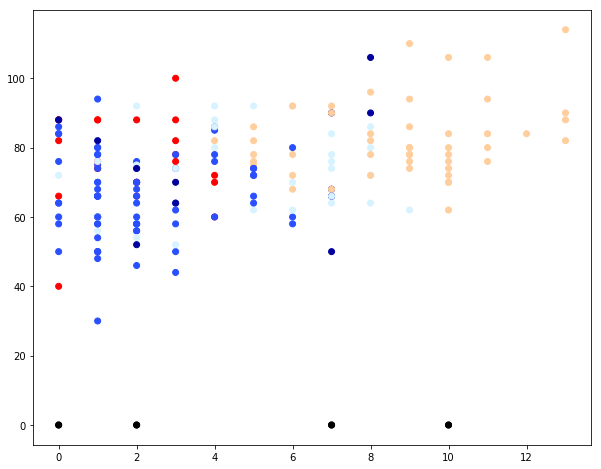

In [147]:
plt.figure(figsize=(10, 8))
plt.scatter(data_for_clust[:,0], data_for_clust[:,2], c=km.labels_, cmap='flag')
plt.show()

In [148]:
# к оригинальным данным добавляем номера кластеров
dataK=data
dataK['group_no']=clusters
writer = pd.ExcelWriter('result2.xlsx')
dataK.to_excel(writer,'KMeans')
writer.save()